# <center>Data 515 Homework 1
    
## Instructions

Using the counts of bicycle crossings of the Fremont Birdge since 2012 (found [here](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k)) perform the following tasks:

1. Read the CSV file into a pandas dataframe. (1 pt)  
2. Add columns to the dataframe containing: (3 pt)  
    i. The total (East + West) bicycle count  
    ii. The hour of the day  
    iii. The year  
3. Create a dataframe with the subset of data from the year 2016 (1 pt)
4. Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) (1 pt)
5. Use pandas to determine what is (on average) the busiest hour of the day (1 pt)
    
For more information on the assignment tasks, see assignment sheet [here](https://github.com/UWSEDS/manipulating-data-in-python-hmurph3).

For more information about Seattle's Open Data Program (which makes data generated by the City of Seattle availible to the public) see [here](http://www.seattle.gov/tech/initiatives/open-data).


## Import libraries to perform tasks

In [1]:
# for Dataframe analysis
import pandas as pd

# for plotting
import matplotlib.pyplot as plt 

## 1. Read the CSV file into pandas dataframe

In [2]:
# read the data into a pandas dataframe
df = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', sep = ",", header = 0)

In [3]:
# view the first 5 rows of the dataframe
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


## 2. Add columns to the dataframe containing:
i. The total (East + West) bicycle count  
ii. The hour of the day  
iii. The year

In [4]:
df['Total'] = df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk']

In [5]:
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0


In [6]:
# verify the format of the entries in the Date column are strings in order to use the datetime function in pandas
type(df.Date[1])

str

In [7]:
# Convert Date column to datetime format 
df['Date'] = pd.to_datetime(df['Date'], format ='%m/%d/%Y %I:%M:%S %p') 

In [8]:
# Create a new column for the Hour of the Day from the Date column
df['Hour of Day'] = pd.DatetimeIndex(df['Date']).hour

In [9]:
# Create a new column for the year from the Date column
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [10]:
# Check to see that the additional columns were created correctly
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour of Day,Year
0,2019-03-31 23:00:00,6.0,10.0,16.0,23,2019
1,2019-03-31 22:00:00,7.0,14.0,21.0,22,2019
2,2019-03-31 21:00:00,18.0,15.0,33.0,21,2019
3,2019-03-31 20:00:00,26.0,31.0,57.0,20,2019
4,2019-03-31 19:00:00,30.0,58.0,88.0,19,2019


## 3. Create a dataframe with the subset of data from the year 2016

In [11]:
# create a subset of the total dataset that only contains information from 2016
subset = df.loc[df['Year'] == 2016]

In [12]:
# check the output of the subsetting
subset.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour of Day,Year
19680,2016-12-31 23:00:00,4.0,4.0,8.0,23,2016
19681,2016-12-31 22:00:00,7.0,8.0,15.0,22,2016
19682,2016-12-31 21:00:00,4.0,6.0,10.0,21,2016
19683,2016-12-31 20:00:00,3.0,6.0,9.0,20,2016
19684,2016-12-31 19:00:00,6.0,4.0,10.0,19,2016


## 4. Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis)

In [13]:
# find the total crossing by hour of they day
hourly_counts = df.groupby('Hour of Day',as_index = False)[['Total']].sum()

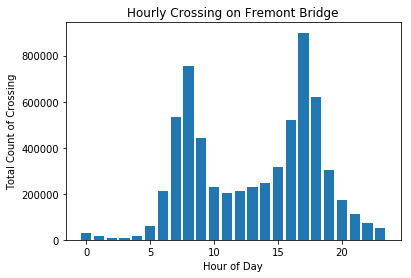

In [14]:
# create a bar plot of the total crossing by hour of the day
plt.bar(hourly_counts["Hour of Day"], hourly_counts["Total"], align='center')
plt.ylabel('Total Count of Crossing')
plt.xlabel('Hour of Day')
plt.title('Hourly Crossing on Fremont Bridge')
 
plt.show()

## 5. Use pandas to determine what is (on average) the busiest hour of the day

In [15]:
# find the average hourly count by hour of the bridge crossings
avg_hourly_counts = df.groupby('Hour of Day',as_index = False)[['Total']].mean()

In [16]:
# Return the hour that has the maximumn average crossing.
avg_hourly_counts['Total'].idxmax()

17